In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
raw_data = pd.read_csv('predicting_air_pollution/train.csv')

In [4]:
raw_data.shape

(7111, 12)

In [5]:
raw_data['date_time'] = pd.to_datetime(raw_data['date_time'])

In [6]:
train_dat = raw_data[raw_data['date_time'].dt.month < 9][:-1]

In [7]:
val_dat = raw_data[(raw_data['date_time'].dt.month == 9) | (raw_data['date_time'].dt.month == 10)]

In [8]:
test_dat = raw_data.iloc[5646:,:]

In [9]:
raw_data.columns

Index(['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'],
      dtype='object')

In [10]:
target_cols = ['target_carbon_monoxide','target_benzene','target_nitrogen_oxides']

In [11]:
X_train = train_dat.drop(columns=target_cols)
y_train = train_dat[target_cols]
X_val = val_dat.drop(columns=target_cols)
y_val = val_dat[target_cols]
X_test = test_dat.drop(columns=target_cols)
y_test = test_dat[target_cols]

In [12]:
train_dat.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
count,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000
mean,23.115088,42.467073,1.120842,1073.383596,914.995289,927.305858,1584.346150,929.064180,1.837040,9.439192,115.451076
std,7.794201,15.890193,0.378673,200.932886,255.712787,279.310365,311.853684,340.052791,1.192578,6.627021,77.429625
min,5.700000,8.900000,0.213600,665.500000,364.000000,407.900000,552.900000,257.700000,0.100000,0.100000,1.900000
25%,17.000000,30.100000,0.874600,929.700000,732.250000,740.000000,1420.150000,677.000000,0.900000,4.500000,56.700000
50%,23.000000,42.000000,1.071650,1045.700000,898.900000,866.100000,1573.850000,875.700000,1.600000,8.200000,97.500000
75%,28.100000,53.800000,1.352475,1176.200000,1082.600000,1044.775000,1753.175000,1127.950000,2.400000,13.000000,154.400000
max,46.100000,88.600000,2.180600,1999.200000,1852.900000,2009.200000,2779.300000,2450.200000,8.300000,41.600000,633.800000


In [13]:
train_dat.corr()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
deg_C,1.000000,-0.748342,0.413191,-0.073790,0.170475,-0.295432,0.125683,-0.015868,0.015968,0.142184,0.002627
relative_humidity,-0.748342,1.000000,0.182620,0.002909,-0.189554,0.104206,0.049115,0.002430,-0.111312,-0.179573,-0.104438
absolute_humidity,0.413191,0.182620,1.000000,-0.106478,0.120637,-0.491623,0.434420,0.030245,-0.103006,0.057172,-0.125695
sensor_1,-0.073790,0.002909,-0.106478,1.000000,0.761866,-0.519164,0.617953,0.830141,0.867445,0.798879,0.805978
sensor_2,0.170475,-0.189554,0.120637,0.761866,1.000000,-0.828066,0.872471,0.844213,0.865766,0.964603,0.834785
sensor_3,-0.295432,0.104206,-0.491623,-0.519164,-0.828066,1.000000,-0.860333,-0.674174,-0.585218,-0.745321,-0.564518
sensor_4,0.125683,0.049115,0.434420,0.617953,0.872471,-0.860333,1.000000,0.740937,0.702352,0.844872,0.670847
sensor_5,-0.015868,0.002430,0.030245,0.830141,0.844213,-0.674174,0.740937,1.000000,0.847456,0.870123,0.850841
target_carbon_monoxide,0.015968,-0.111312,-0.103006,0.867445,0.865766,-0.585218,0.702352,0.847456,1.000000,0.922544,0.920326
target_benzene,0.142184,-0.179573,0.057172,0.798879,0.964603,-0.745321,0.844872,0.870123,0.922544,1.000000,0.885879


In [14]:
plt.rcParams["figure.figsize"] = (20,10)

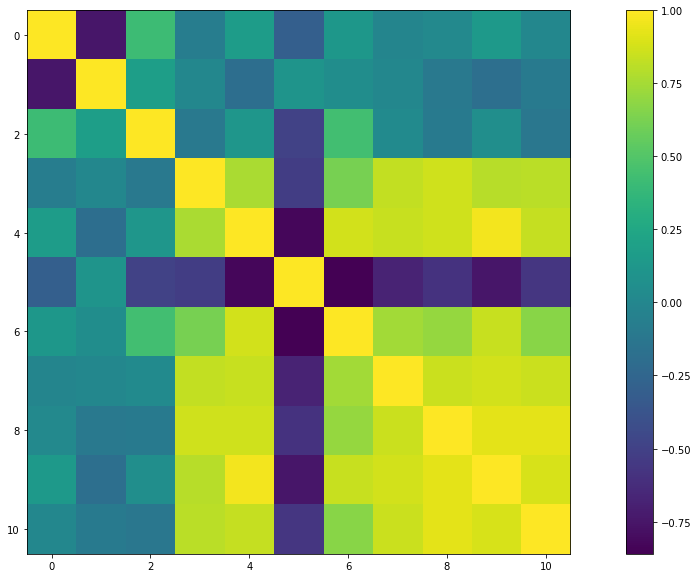

In [15]:
plt.imshow(train_dat.corr())
plt.colorbar()

Text(0, 0.5, 'target_carbon_monoxide')

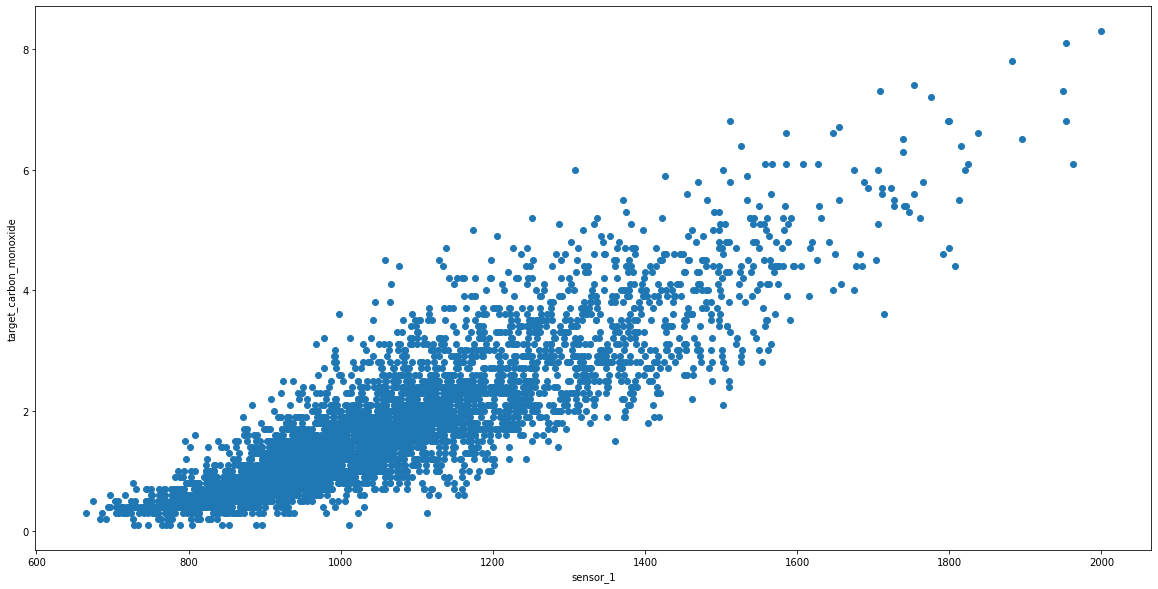

In [16]:
plt.scatter(train_dat.iloc[:,4],train_dat.iloc[:,9])
plt.xlabel(train_dat.iloc[:,4].name)
plt.ylabel(train_dat.iloc[:,9].name)

Text(0, 0.5, 'target_carbon_monoxide')

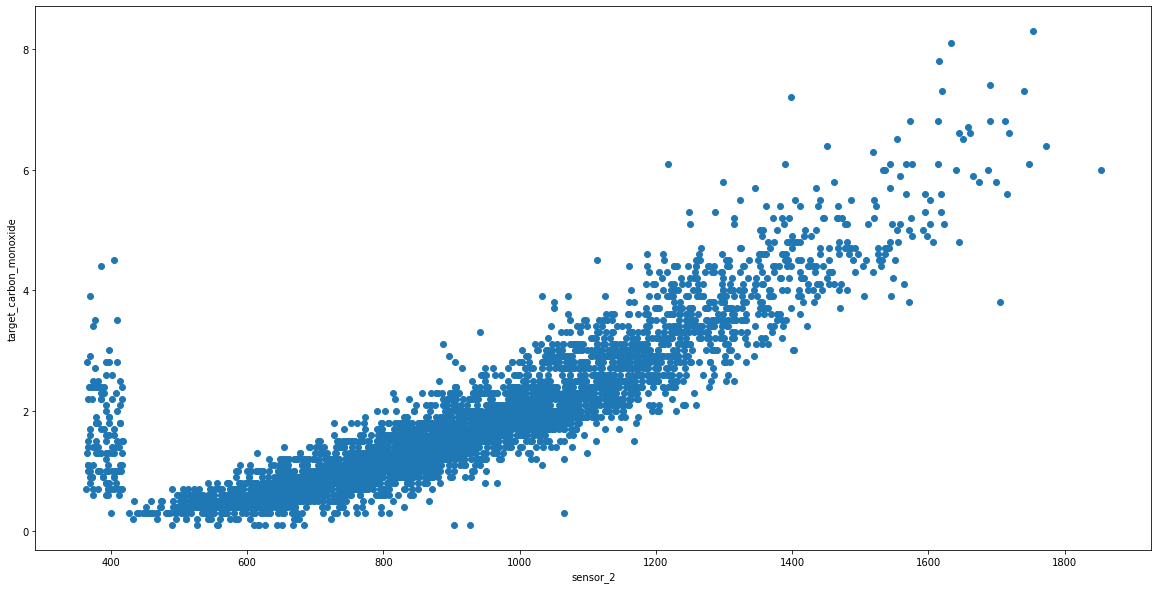

In [17]:
plt.scatter(train_dat.iloc[:,5],train_dat.iloc[:,9])
plt.xlabel(train_dat.iloc[:,5].name)
plt.ylabel(train_dat.iloc[:,9].name)

Text(0, 0.5, 'target_carbon_monoxide')

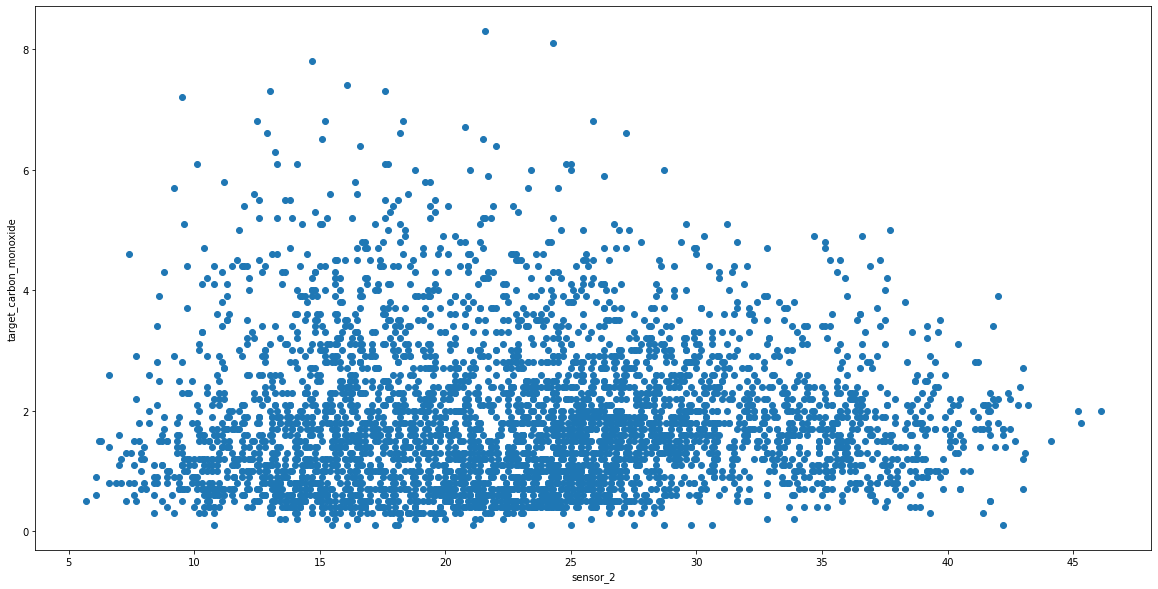

In [18]:
plt.scatter(train_dat.iloc[:,1],train_dat.iloc[:,9])
plt.xlabel(train_dat.iloc[:,5].name)
plt.ylabel(train_dat.iloc[:,9].name)

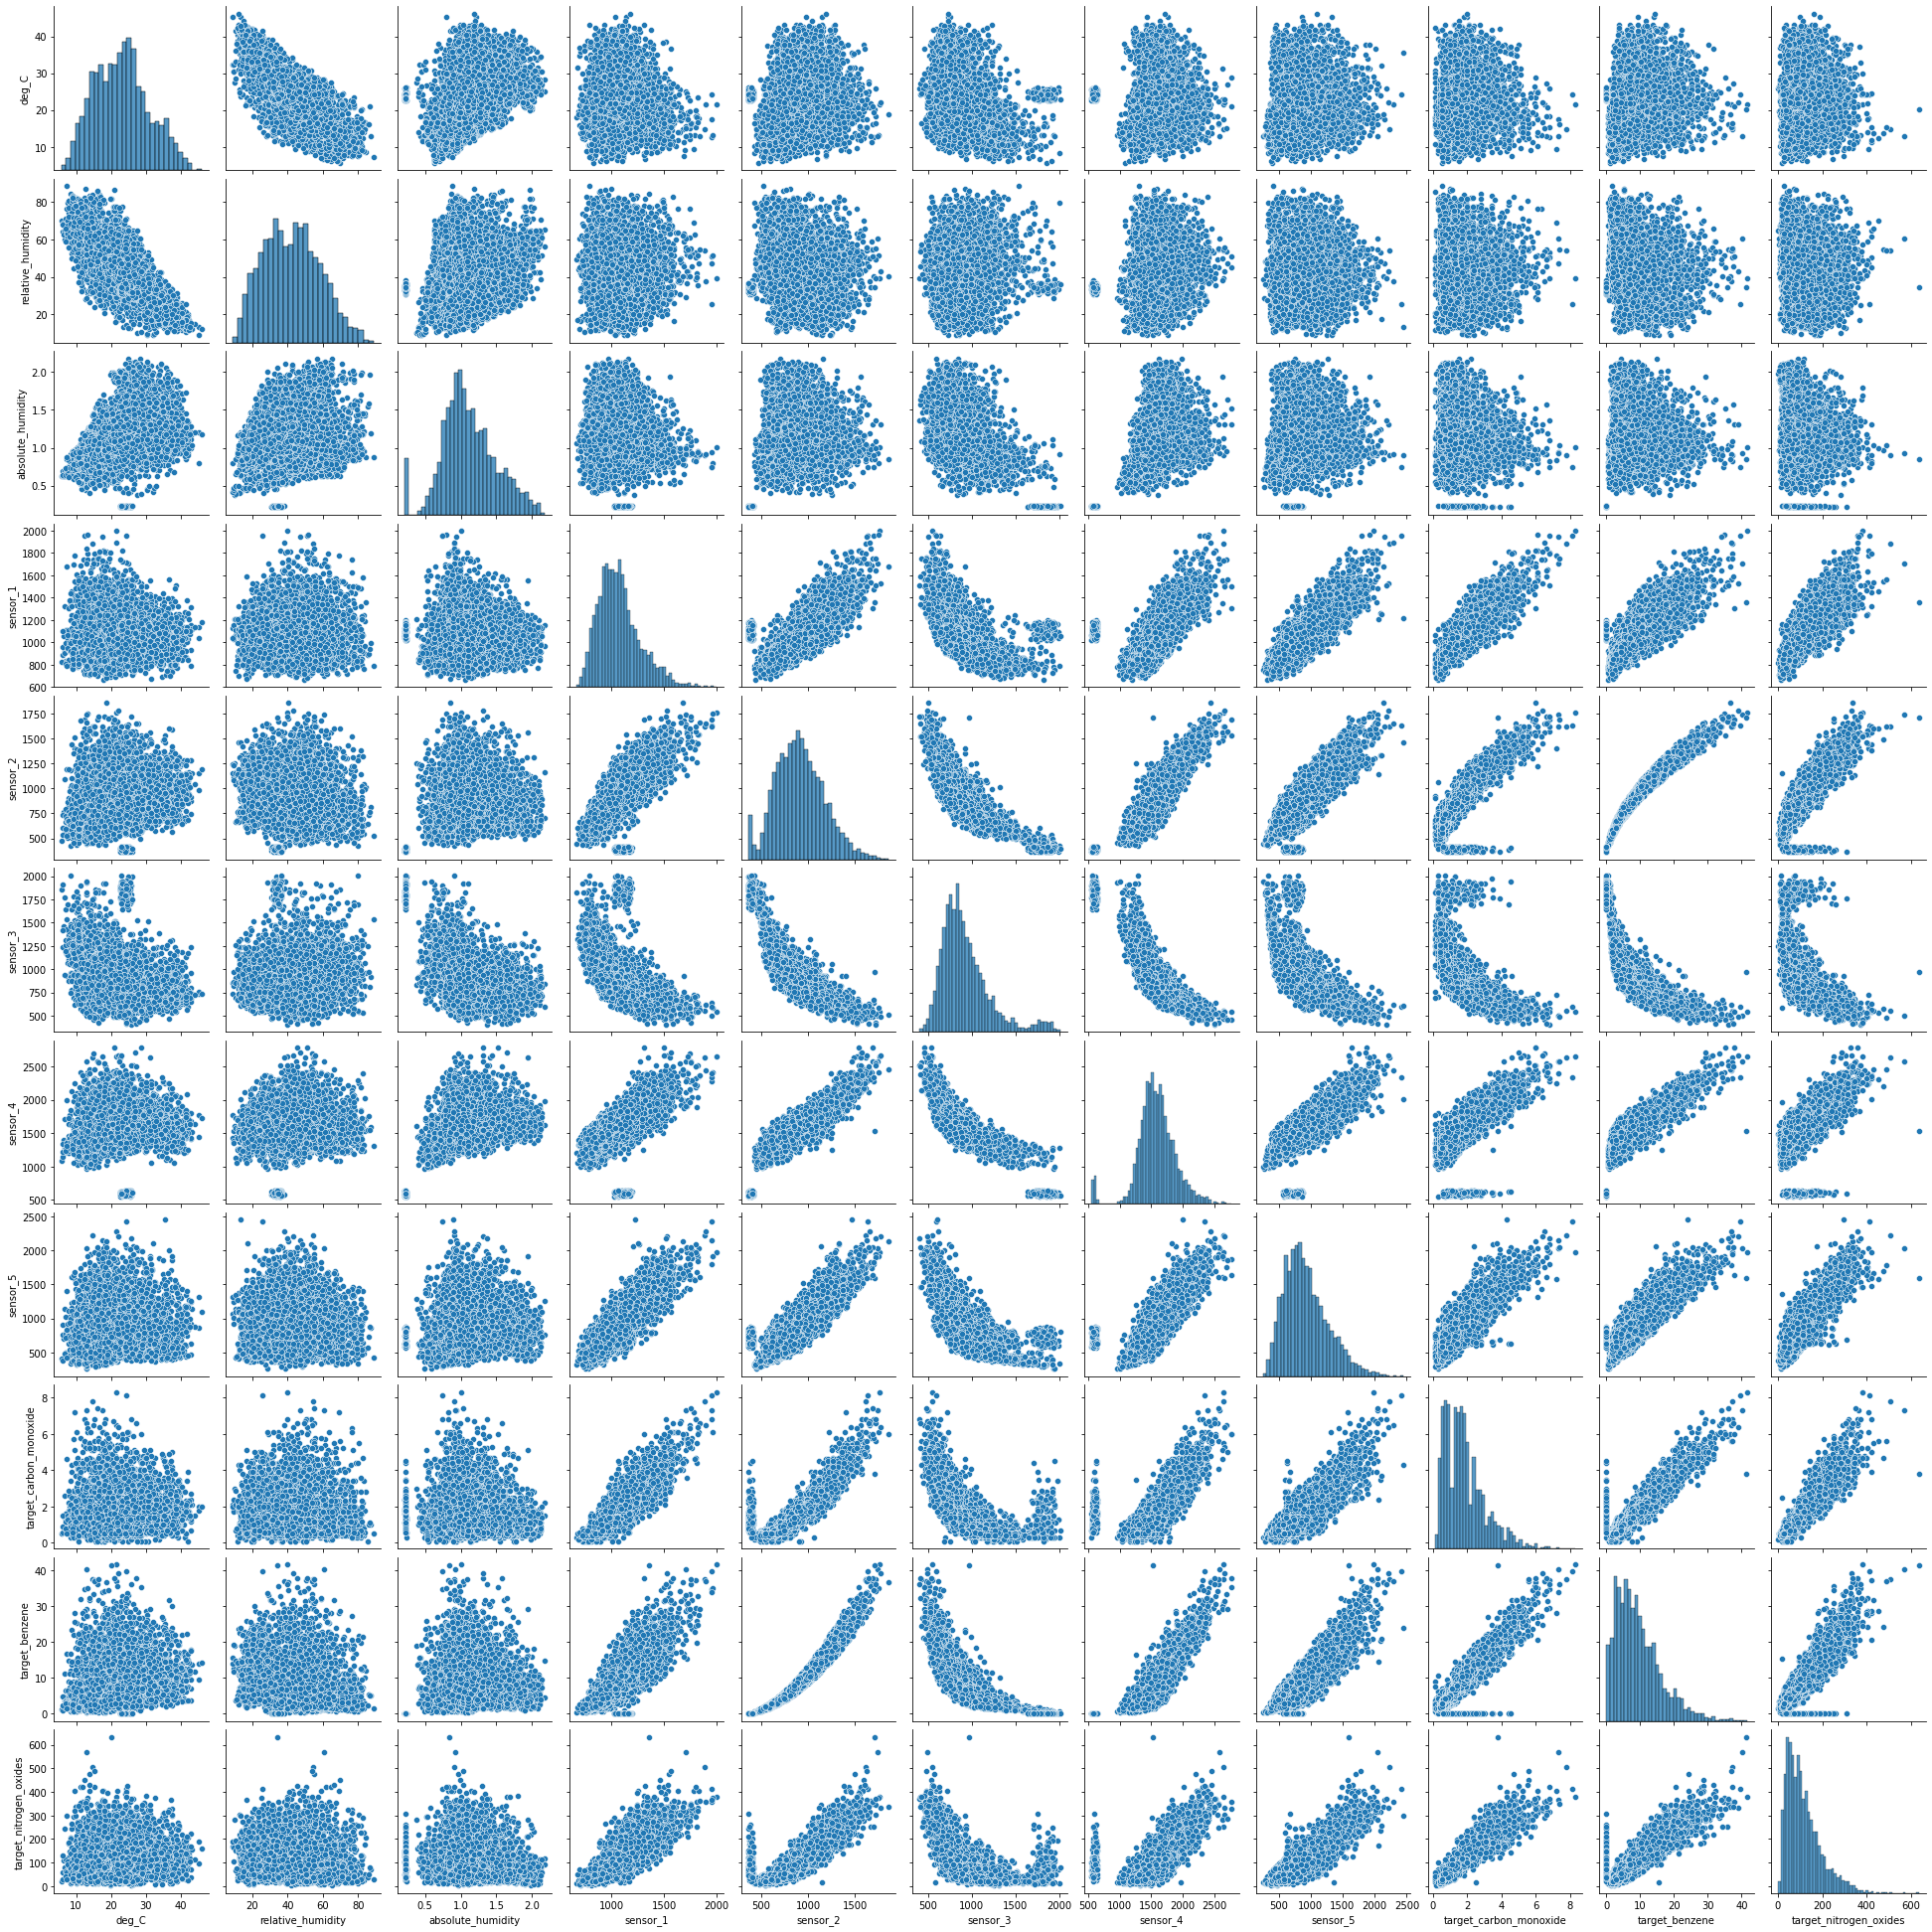

In [19]:
sns.pairplot(train_dat)

In [20]:
month_beg = train_dat[train_dat['date_time'].dt.is_month_start].index.to_list()

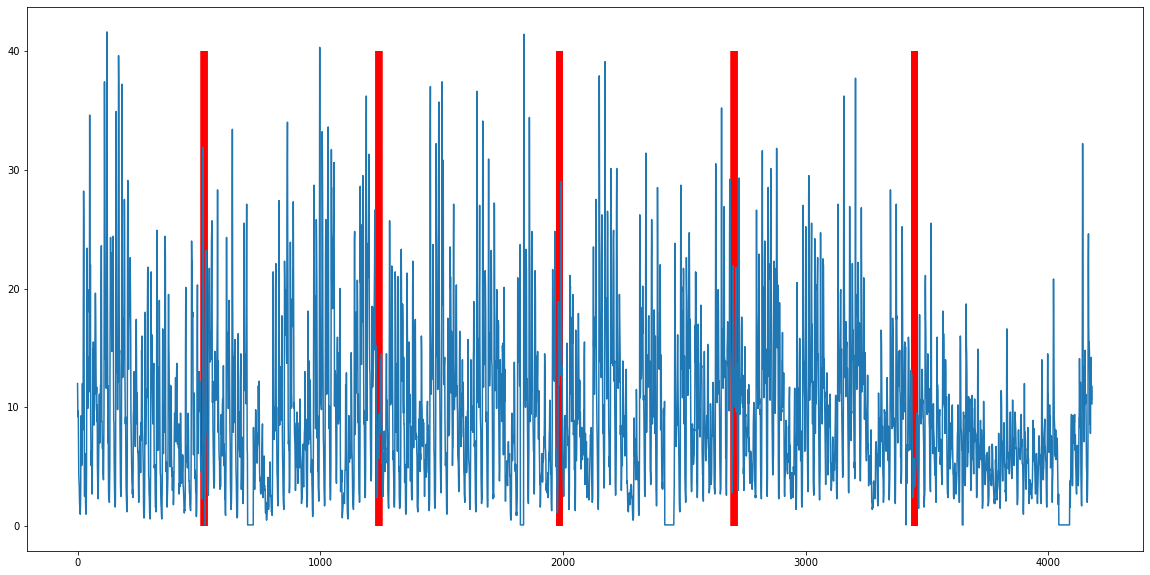

In [21]:
plt.plot(train_dat['target_benzene'])
plt.vlines(month_beg,ymin=0,ymax=40,colors='red')

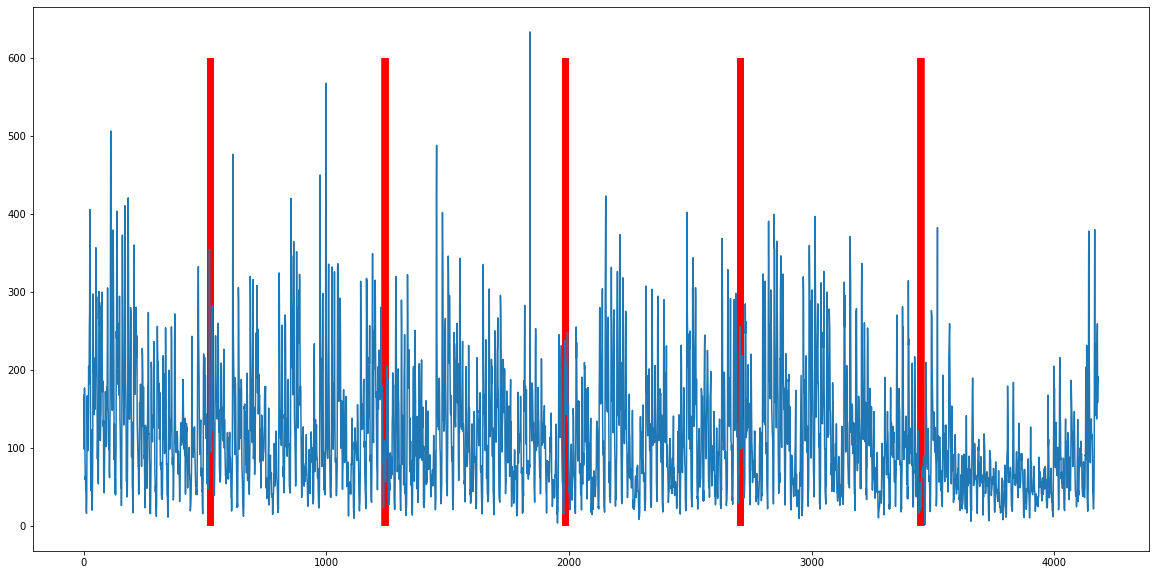

In [22]:
plt.plot(train_dat['target_nitrogen_oxides'])
plt.vlines(month_beg,ymin=0,ymax=600,colors='red')

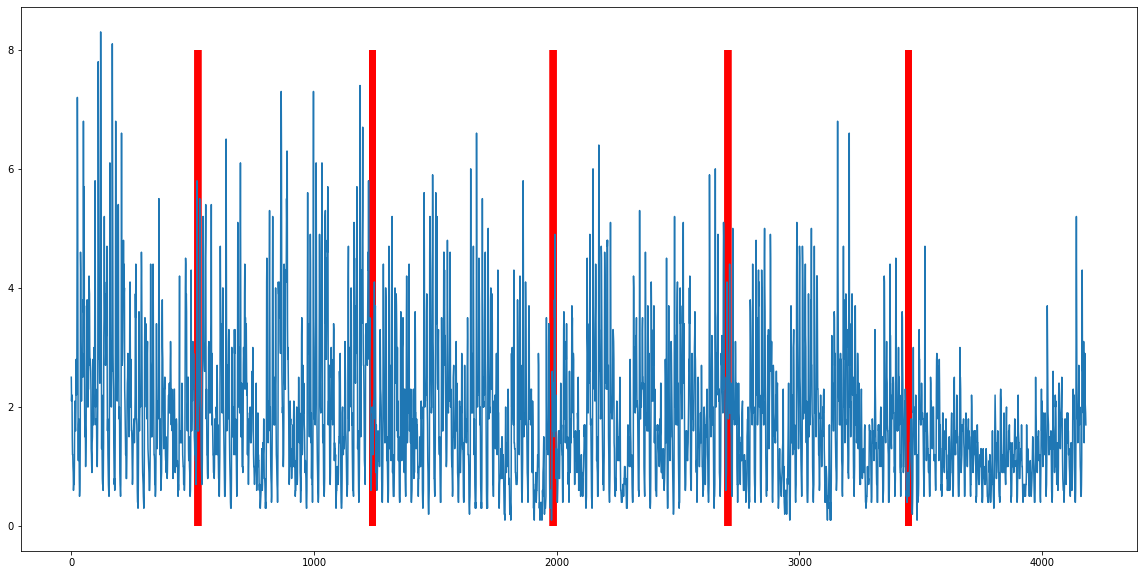

In [23]:
plt.plot(train_dat['target_carbon_monoxide'])
plt.vlines(month_beg,ymin=0,ymax=8,colors='red')

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()
model.fit(X_train.drop(columns='date_time'),y_train)

LinearRegression()

In [26]:
model.predict(X_val.drop(columns='date_time'))

array([[  1.390008  ,   7.98504495,  89.10685434],
       [  1.15571461,   6.42952653,  70.81989125],
       [  0.24300415,   1.55179758,  22.9531197 ],
       ...,
       [  2.68260851,  14.88927857, 169.60403203],
       [  2.58551541,  14.07164399, 167.28941554],
       [  2.45731577,  12.73469915, 152.2448611 ]])

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mean_squared_error(y_train,model.predict(X_train.drop(columns='date_time')))

346.6958795969089

In [29]:
mean_squared_error(y_val,model.predict(X_val.drop(columns='date_time')))

9375.004074251005

In [30]:
from sklearn.linear_model import Ridge

In [31]:
model = Ridge(alpha=0.5)
model.fit(X_train.drop(columns='date_time'),y_train)

Ridge(alpha=0.5)

In [32]:
mean_squared_error(y_train,model.predict(X_train.drop(columns='date_time')))

346.6965092875724

In [33]:
mean_squared_error(y_val,model.predict(X_val.drop(columns='date_time')))

9371.110169143632

In [34]:
val_err = []
train_err = []
for i in [1e10,1e9,1e8,1e7,1e6,1e5,1e4,1e3,500,100,50,10,5,1,0.1,0.01,0.001]:
    model = Ridge(alpha=i)
    model.fit(X_train.drop(columns='date_time'),y_train)
    train_err.append(mean_squared_error(y_train,model.predict(X_train.drop(columns='date_time'))))
    val_err.append(mean_squared_error(y_val,model.predict(X_val.drop(columns='date_time'))))

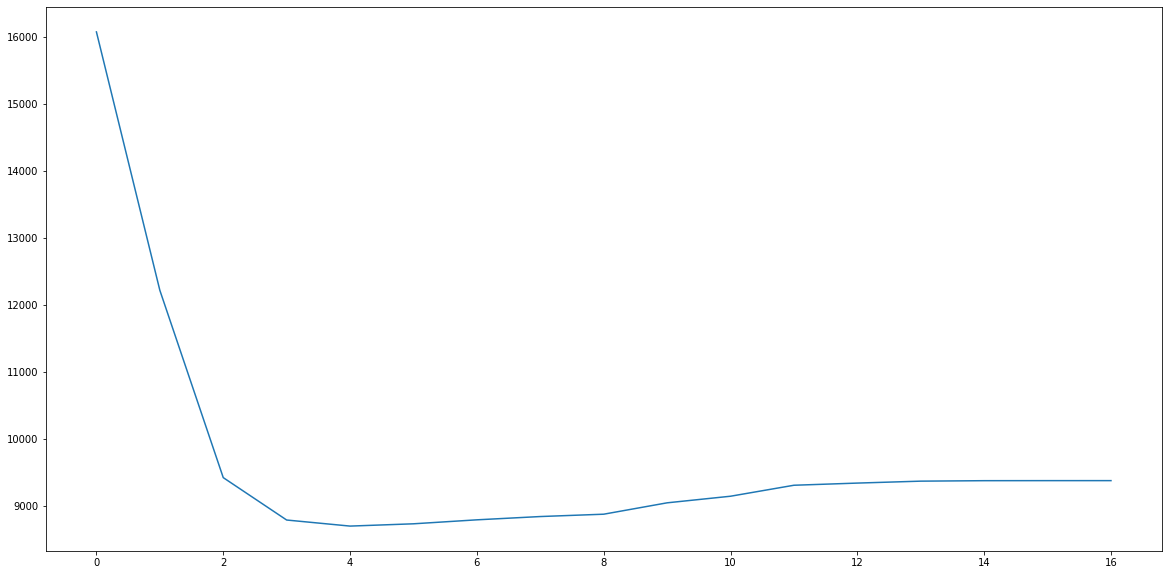

In [35]:
plt.plot(val_err)

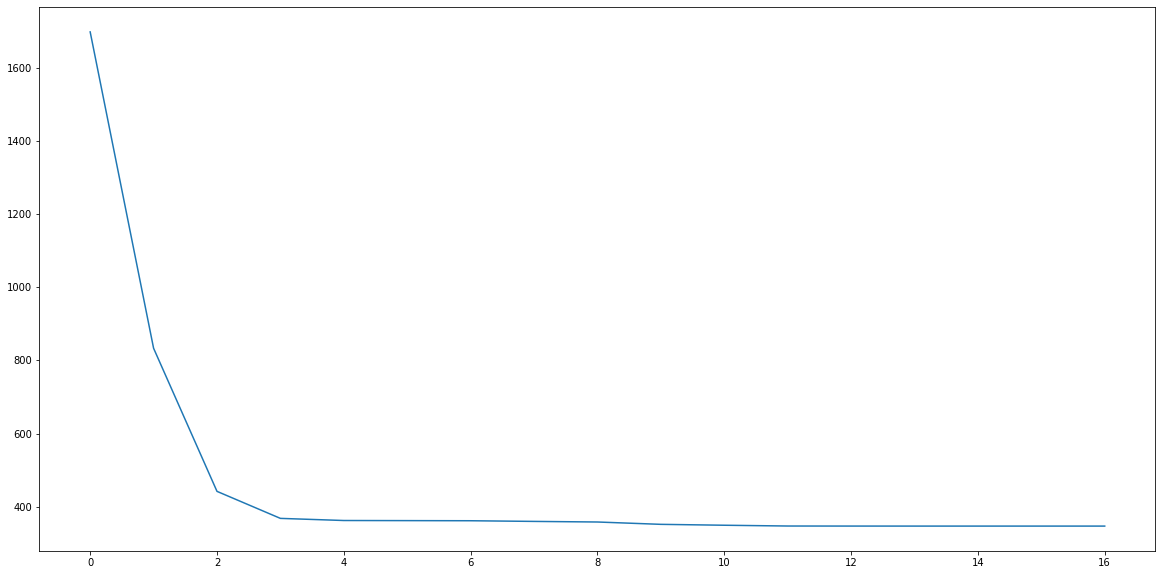

In [36]:
plt.plot(train_err)

In [37]:
def RMSLE(true_dat,pred_dat):
    sum = 0
    for i in range(len(true_dat.columns)):
        sum += np.sqrt(np.mean((np.log(pred_dat[:,i]) - np.log(true_dat.iloc[:,i]))**2))
    return sum/len(true_dat.columns)

In [38]:
RMSLE(y_val,model.predict(X_val.drop(columns='date_time')))

<ipython-input-37-00e47dff1419>:4: RuntimeWarning: invalid value encountered in log
  sum += np.sqrt(np.mean((np.log(pred_dat[:,i]) - np.log(true_dat.iloc[:,i]))**2))


0.5223134132959432